## Part 1

Write a script to generate an
p
-ER random graph

Write a script to generate an
r
-regular random graph.

In [43]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy.linalg as alg
import numpy as np

In [44]:
n = 6
m = 3
p = 0.3
r = 5

# create a G_n,m random graph
Gnm = nx.gnm_random_graph(n = n, m = m)
# the adjacency matrix
A_Gnm = nx.to_numpy_matrix(Gnm)
# create a G_n,p random graph
Gnp = nx.gnp_random_graph(n=n, p=p)
# the adjacency matrix
A_Gnp = nx.to_numpy_matrix(Gnp)
# create a r-regular random graph
rrG = nx.random_regular_graph(d=r, n=n)
# the adjacency matrix
A_rrG = nx.to_numpy_matrix(rrG)

Write a script to check the connectivity of a given graph.
- algebraic method 1 (irreducibility);
- algebraic method 2 (eigenvalue of the Laplacian matrix);
- breadth-first search algorithm.


In [74]:
# Irreducibility

def Irreducibility(graph):
    A = nx.to_numpy_matrix(graph)
    n = A.shape[0]
    S = np.zeros((n,n))
    for n in range(n):
           S = S + alg.matrix_power(M=A, n=n)
    if S.any() > 0: 
        #print('The graph is irreducible,\n-> The graph is connected')
        return(1)
    else:
        return(0)
    
Irreducibility(rrG)

1

In [75]:
# Eigenvalue of the Laplacian Matrix

def Laplaciaan(graph):
    """
    Output:
    - 1 if the graph is connected, 0 otherwise
    """
    # graph adjacency matrix
    A = nx.to_numpy_matrix(graph)
    # diagonal matrix matrix containing degrees
    D = np.diag([degree[1] for degree in nx.degree(G=graph)])
    # Laplacian matrix
    L = D-A
    eig = np.sort(alg.eig(L)[0])
    #print(eig)
    if eig[1] > 0: 
        #print('Second eigenvalue greater than zero,\n-> The grapg is connected')
        return(1)
    else: 
        #print('Second eigenvalue is zero,\n-> The grapg is not connected')
        return(0)
    
Laplaciaan(rrG)

1

In [49]:
from numpy import inf
import networkx as nx
import queue as qu
import matplotlib.pyplot as plt

In [50]:
G = nx.random_regular_graph(d=9, n=10)

In [76]:
# Breath First Search

def BFS(G, i):
    '''
    This function performs the Breath First Search algorithm in order to find the hop-distances of all the 
    other nodes in the graph with respect to node i.
    
    Input:
    - G: a graph
    - i: a root
    
    Output: 
    - distances: a dictionary in which each key is a node of G, 
        and each value is the hop-distance from the root i
    '''
    # initialization
    for node in list(G.nodes):
        G.node[node]["Distance"] = inf
        G.node[node]["Parent"] = "NIL"
    Q = qu.Queue()
    root = i
    G.node[root]["Distance"] = 0
    Q.put(root)
    while not Q.empty():
        current = Q.get()
        for neigh in nx.all_neighbors(G,current):
            if G.node[neigh]["Distance"] == inf:
                G.node[neigh]["Distance"] = G.node[current]["Distance"]+1
                G.node[neigh]["Parent"] = current
                Q.put(neigh)

    distances = nx.get_node_attributes(G, "Distance").values()
    return(distances)

def BFS_connectivity(G):
    '''
    This function check if a graph is connected using the Breath First Search algorithm.
    BFS is performed starting from each node in the graph.
    Then, every time the function checks whether any of the hop-distances is infinite.
    If the control passes for each node in the graph, we can assert that the graph is connected.
    
    Input:
    - G a graph
    
    Output: 
    - a string claiming whether the graph is connected, or not.
    - 1 if the graph is connected, 0 otherwise
    '''
    for start in G.nodes():
        distances = list(BFS(G, start))
        if any(t == inf for t in distances):   
            #print('Found not connected nodes,\n-> The graph is not connected')
            return(0)
    #print('All the nodes are connected,\n-> The graph is connected')
    return(1)
        
BFS_connectivity(G=G)

1

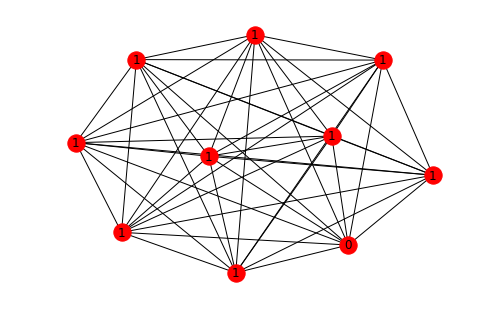

In [40]:
# Plot the graph

pos = nx.spring_layout(G)
nx.draw(G, pos)
node_labels = nx.get_node_attributes(G,'Distance')
nx.draw_networkx_labels(G,pos, labels = node_labels)
plt.show() 

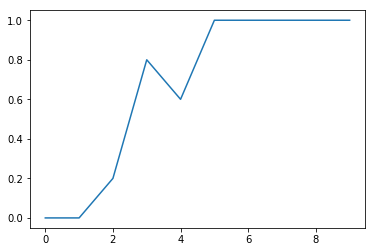

In [102]:
def p_er_re(n = 10, p_by = 0.1):
    # simulation size for propability estimation
    B = 5
    # create a vector of probabilities
    p = np.arange(0,1,p_by)
    # initiate outcome list
    pc = []
    for i in range(len(p)):
        phat = []
        for b in range(B): 
            # create a G_n,p random graph
            Gnp = nx.gnp_random_graph(n=n, p=p[i])
            # check whether the graph is connected and append the
            # result of the test in the out list
            phat.append(BFS_connectivity(Gnp))
        phat = np.array(phat)
        pc.append(np.mean(phat))
    x = np.array(list(range(len(p))))
    y = pc
    plt.plot(x, y)
    plt.show()
    return

p_er_re()

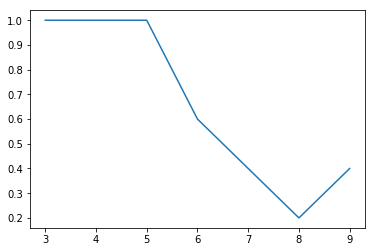

In [100]:
def p_rrrg(r = 2, nmax = 10):
    # simulation size for propability estimation
    B = 5
    # initiate outcome list
    pc = []
    for i in range(r+1,nmax):
        phat = []
        for b in range(B): 
            # create a r-regular random graph
            rrG = nx.random_regular_graph(d=r, n=i)
            # check whether the graph is connected and append the
            # result of the test in the out list
            phat.append(BFS_connectivity(rrG))
        phat = np.array(phat)
        pc.append(np.mean(phat))
    x = np.array(list(range(r+1,nmax)))
    y = pc
    plt.plot(x, y)
    plt.show()
    return
p_rrrg()